In [8]:
# !pip install gensim
# !pip install scipy==1.12
# !pip install stop-words
# !pip install torch
# !pip install transformers
# !pip install scikit-learn
# !pip install nltk
# ! pip install protobuf

In [2]:
import pandas as pd
# from tqdm.notebook import tqdm as tqdm_notebook
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import gensim
import copy
import time
import numpy as np
import torch
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import nltk
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.tokenize import RegexpTokenizer


# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('russian')
stop_words.extend(['доброго', 'времени', 'суток'])

%matplotlib inline

## LABSE vectorization

In [3]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/LaBSE-en-ru")
model = AutoModel.from_pretrained("cointegrated/LaBSE-en-ru")

## RUBERT vectorization

In [4]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

sentences = ["Привет, как дела?", "Машинное обучение очень интересно!"]

inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Get the BERT embeddings
with torch.no_grad():
    outputs = model(**inputs)

# outputs['last_hidden_state'] contains the token-level embeddings for each word
token_embeddings = outputs.last_hidden_state  # (batch_size, sequence_length, hidden_size)

cls_embeddings = token_embeddings[:, 0, :]  # (batch_size, hidden_size)
cls_embeddings = torch.nn.functional.normalize(cls_embeddings, p=2, dim=1)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum lengt

In [5]:
df = pd.read_csv('tickets_processed.csv')

In [6]:
df.head()

,Unnamed: 0,start_dt,end_dt,sender_name,sender_email,theme,descr,sender_name_cut,texts_cmb
0,0,2023-01-01 08:22:15+00,2023-01-01 19:14:50+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20595877,. Доброго времени суток! ПРОСЬБА ПРИ ОТВЕТЕ НА...,content_problem,жалоба абонент просьба ответ запрос использьзо...
1,1,2023-01-01 11:18:47+00,2023-01-01 19:18:36+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20592639,"Доброго времени суток! Абонент утверждает, что...",content_problem,жалоба абонент абонент утверждать заказывать п...
2,2,2023-01-01 12:31:00+00,2023-01-01 18:52:48+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20594559,"Доброго времени суток! Абонент утверждает, что...",content_problem,жалоба абонент абонент утверждать заказывать п...
3,3,2023-01-01 13:15:12+00,2023-01-01 18:51:01+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20593507,"Доброго времени суток! Абонент утверждает, что...",content_problem,жалоба абонент абонент утверждать заказывать п...
4,4,2023-01-01 13:15:12+00,2023-01-01 18:52:00+00,content_problem,content_problem@tele2.ru,Жалоба абонента TT20593899,"Доброго времени суток! Абонент утверждает, что...",content_problem,жалоба абонент абонент утверждать заказывать п...


# Clustering analysis

Для векторизации текста использовалась модель LaBSE от @cointegrated.
Подберем количество кластеров

In [35]:
# tokenizer = RegexpTokenizer(r'\w+')

# def preprocess(text):
#     tokens = ' '.join(tokenizer.tokenize(text))

#     return ' '.join([word for word in tokens.lower().split() if word not in stop_words])
#df['sentences'] = df['descr'].astype(str) + df['theme'].astype(str)

In [7]:
df.texts_cmb = df.texts_cmb.astype(str)

In [8]:
embeddings_list = []

for s in df.texts_cmb:
    encoded_input = tokenizer(s, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embedding = model_output.pooler_output
    embeddings_list.append((embedding)[0].numpy())


df['embeddings'] = embeddings_list
# df.to_csv('out.csv', index=False)

In [ ]:
# for BERT
torch.nn.functional.normalize(embeddings_list, p=2, dim=1)

In [13]:
# df = pd.read_csv('out.csv')
# embeddings_list = df['embeddings'].astype('float').to_list()
# embeddings = np.asarray(embeddings_list)

In [21]:
embeddings = np.asarray(embeddings_list)

## KMeans

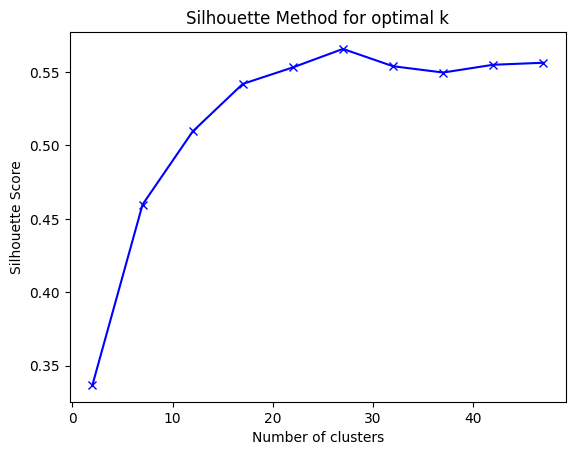

In [15]:
# Подберем количество кластеров

k_values = [x for x in range(2, 50, 5)]

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=100).fit(embeddings)
    score = silhouette_score(embeddings, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 25, random_state = 100500).fit(embeddings)
kmeans_labels = kmeans.labels_

kmeans.cluster_centers_ = kmeans.cluster_centers_.astype(np.float32)

In [13]:
data = pd.DataFrame()
data['text'] = df.texts_cmb
data['label'] = kmeans_labels
data['embedding'] = list(embeddings)

In [14]:
ypred = kmeans.predict(embeddings)

In [15]:
kmeans_centers = kmeans.cluster_centers_
top_texts_list = []
for i in range (0, 25):
    cluster = data[data['label'] == i]
    embeddings = list(cluster['embedding'])
    texts = list(cluster['text'])
    distances = [euclidean_distances(kmeans_centers[0].reshape(1, -1), e.reshape(1, -1))[0][0] for e in embeddings]
    scores = list(zip(texts, distances))
    top_3 = sorted(scores, key=lambda x: x[1])[:3]
    top_texts = list(zip(*top_3))[0]
    top_texts_list.append(top_texts)

In [17]:
data.groupby('label')['label'].sum()

label
0         0
1      2445
2       336
3       279
4       688
5       865
6      1026
7      3003
8      2872
9      8685
10     2970
11     5225
12     5364
13     1794
14     5880
15     6795
16     6080
17     7871
18      864
19     7125
20     3100
21    10479
22     5368
23     4324
24     7536
Name: label, dtype: int32

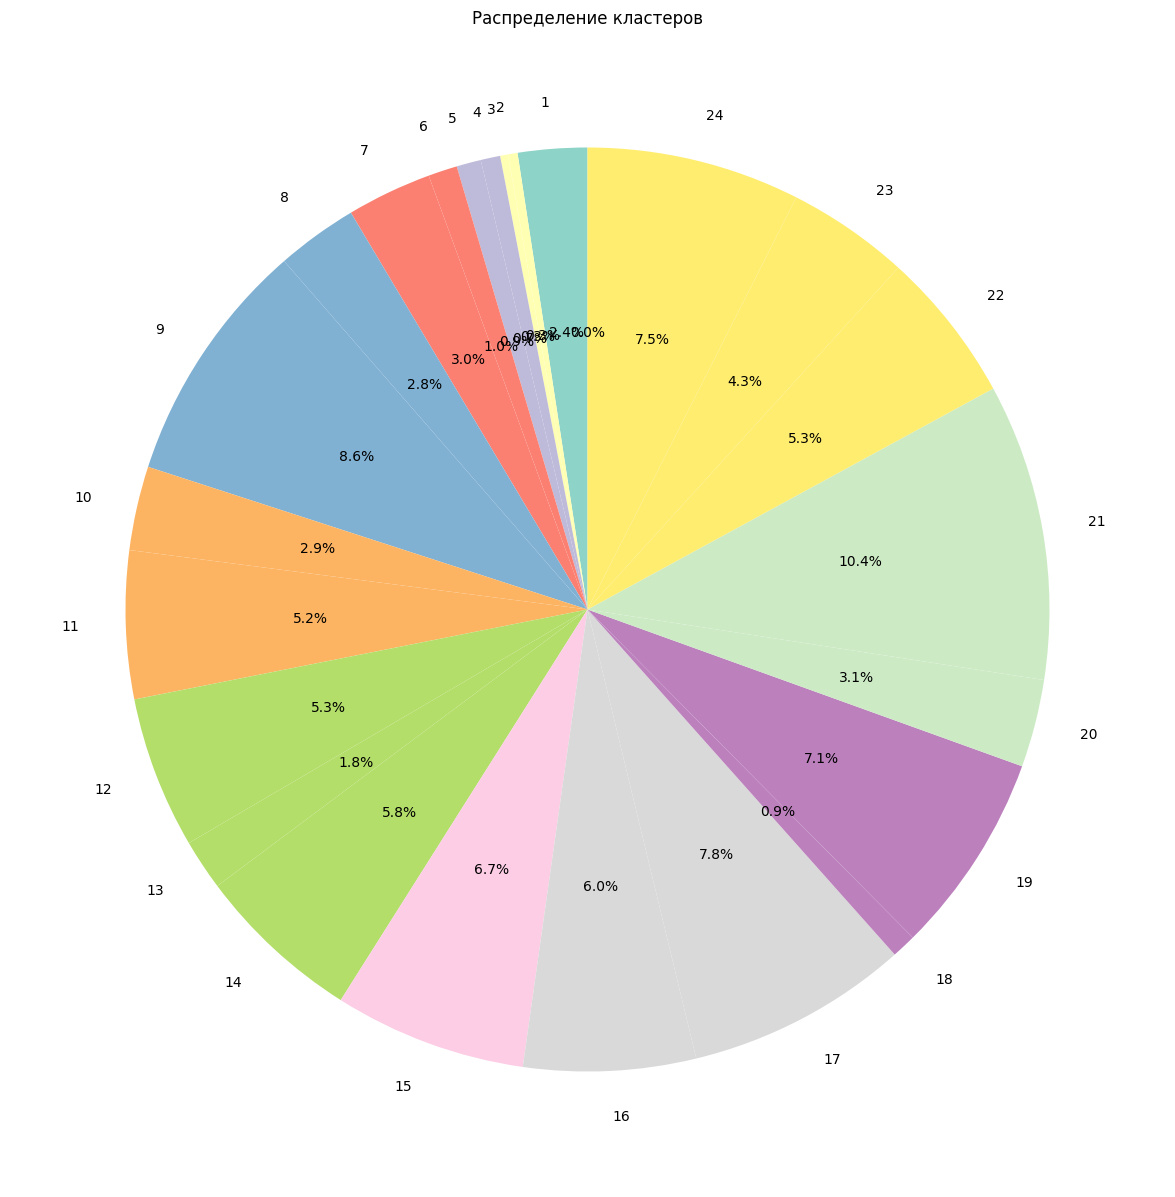

In [22]:
label_counts = data.groupby('label')['label'].sum()

# Plot a pie chart
plt.figure(figsize=(15, 15)) 
label_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.ylabel('')
plt.title('Распределение кластеров')
plt.show()

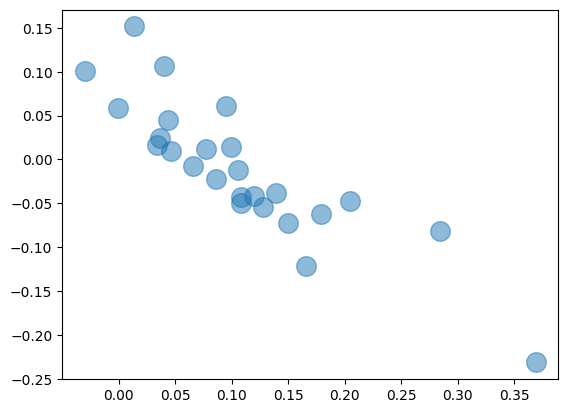

In [23]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5);

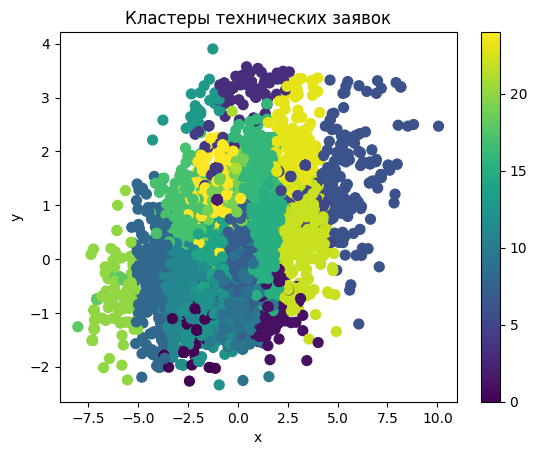

In [24]:
# Reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotting
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=ypred, s=50)
plt.colorbar()  # Optional: Add color bar to see the mapping of colors to classes
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеры технических заявок')
plt.show()

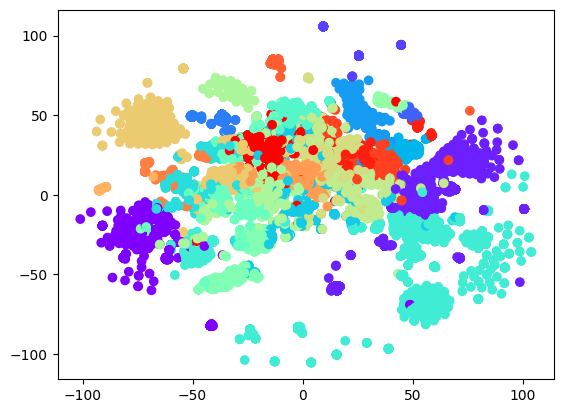

In [25]:
# t-SNE для визуализации
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(embeddings)

# Визуализация кластеров
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=ypred, cmap='rainbow')
plt.show()

Посмотрим примеры кластеров

In [26]:
with pd.option_context('display.max_colwidth', None):
    display(data[data['label'] == 10][['text']])

,text
132,учётный запись мератело ооо мегафон коллега день просить завести новый учётный запись мератело ооо мегафон триал стандартный дата создание учётный запись кейс авторизация текст пушить подтвердить вход сайт хороший пожелание алексей васильев руководитель направление развитие сервис платформа теле2 россия поселение московский киевский шоссе й километр далее
386,учётный запись интернет-банк долинск мтс коллега день просить внести изменение уза интернет банк долинск мтс изменить каскад аутентификатор уза требоваться симлёсс пуш хороший пожелание алексей васильев руководитель направление развитие сервис платформа теле2 россия поселение московский киевский шоссе й километр далее стр моб теле2
388,учётный запись автокомплекс евроавто мегафон коллега день просить завести новый учётный запись автокомплекс евроавто мегафон триал стандартный дата создание учётный запись кейс авторизация текст пушить подтвердить вход сайт евроавто хороший пожелание алексей васильев руководитель направление развитие сервис платформа теле2 россия поселение московский киевский шоссе й километр далее стр моб
436,уза аптека легко коллега день просить настроить ещё учётный запись уза аптека легко билайн хороший пожелание алексей васильев руководитель направление развитие сервис платформа теле2 россия поселение московский киевский шоссе й километр далее стр моб теле2 васильев алексей
502,учётный запись коллега день просить завести новый учётный запись мтс триал транзакция момент создание учётный запись хороший пожелание алексей васильев руководитель направление развитие сервис платформа теле2 россия поселение московский киевский шоссе й километр далее стр моб теле2 мтс
...,...
9831,вопрос по интеграция коллега включить уза вариант пожалуйста хороший пожелание алексей васильев руководитель направление развитие сервис платформа теле2 россия поселение московский киевский шоссе й километр далее стр моб теле2 васильев алексей владимирович теле2
9854,лида из -рассылка день звать юлия представлять компания базио высокий стоимость реклама яндекс директ проблема сталкиваться многие компания помогать снизить затрата привлечение клиент целевой рассылка тщательно подобрать база контакт метод позволять экономить бюджет точно попадать целевой аудитория обеспечивать высокий конверсия готовый обсудить мочь помочь оптимизировать рекламный расход увеличить прибыль связаться
9933,осень время перемена и новый стратегия в управление персонал день связь команда ивента агентство proрадость планировать осенний корпоратив корпоративный мероприятие это мощный инструмент решение задача отправить коллега поход поддержать эмоциональный фон компания создавать общий эмоция радостный воспоминание объединять коллектив нужно приобщить ценность компания корпоративный история отправлять команда охотиться впечатление налаживать общение коммуникация среди коллега игровой активно
10093,установка станция готовый питание милти день рада установить ваш офис микро маркет готовый питание сотрудник милти микро маркет представлять стильный холодильник завтрак салат суп второй блюдо десерт выпечка напиток удачно вписаться любой интерьер офисный пространство решить вопрос питание ваш сотрудников- бесплатный установка ежедневный обслуживание- большой ассортимент блюдо х позиций- выгодный цена р блюдо наш микра


In [27]:
with pd.option_context('display.max_colwidth', None):
    display(data[data['label'] == 9][['text']])

,text
2,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка удаль лишний информация номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс роза
8,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс
31,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс розница номер подписка ооо
32,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс розница номер подписка ооо
39,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка удаль лишний информация номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс рознь
...,...
10232,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка удаль лишний информация номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс
10257,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство май номер провайдер дс инвойс розница номер подписка а1 системс
10258,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка удаль лишний информация номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс розна
10270,жалоба абонент абонент утверждать заказывать просить проверить корректность списание рассмотреть вопрос компенсация просьба отключить абонент подписка удаль лишний информация номер подключить подписка б2с дата подключение подписка б2б дата необходимо скорректировать денежный средство номер провайдер дс инвойс дл


In [29]:
num_clusters = 25
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df.texts_cmb)

# Get the feature names (words)
terms = tfidf_vectorizer.get_feature_names_out()

# Assign sentences to clusters
clusters = {i: [] for i in range(num_clusters)}

for i, label in enumerate(data.label):
    clusters[label].append(i)

In [30]:
def get_top_keywords(cluster_sentences, top_n=5):
    cluster_tfidf = tfidf_matrix[cluster_sentences].mean(axis=0).flatten()
    sorted_indices = cluster_tfidf.argsort()[::-1]  # Sort in descending order
    top_terms = [terms[idx] for idx in sorted_indices[:top_n]]
    return top_terms

# Print top words for each cluster
for cluster, sentences_in_cluster in clusters.items():
    print(f"Cluster {cluster} Top Keywords: {get_top_keywords(sentences_in_cluster)}\n")

Cluster 0 Top Keywords: [array([['00мск', 'предусмотреть', 'предусматривать', ..., 'дата',
        'абонент', 'подписка']], dtype=object)]

Cluster 1 Top Keywords: [array([['00мск', 'преимущество', 'президент', ..., 'абонент', 'номер',
        'подписка']], dtype=object)]

Cluster 2 Top Keywords: [array([['00мск', 'претворять', 'пресс', ..., 'следовать', '2024просьба',
        'подписка']], dtype=object)]

Cluster 3 Top Keywords: [array([['00мск', 'предупредить', 'предстать', ..., 'сообщение',
        'лотерея', 'информация']], dtype=object)]

Cluster 4 Top Keywords: [array([['00мск', 'президент', 'презеп', ..., 'активный', 'навсегда',
        'список']], dtype=object)]

Cluster 5 Top Keywords: [array([['00мск', 'предс', 'предпродажный', ..., 'адресат', 'данный',
        'сообщение']], dtype=object)]

Cluster 6 Top Keywords: [array([['00мск', 'понравиться', 'понимать', ..., 'ремайндёр', 'сие',
        'сообщение']], dtype=object)]

Cluster 7 Top Keywords: [array([['00мск', 'познакомить

## DBSCAN

In [50]:
# Нормализация данных перед кластеризацией
scaler = StandardScaler()
data_scaled = scaler.fit_transform(embeddings)

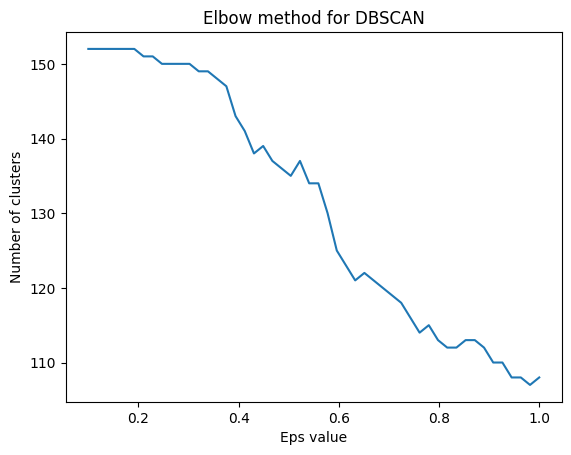

In [51]:
# Диапазон значений для eps
eps_values = np.linspace(0.1, 1.0, 50)
num_clusters = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(embeddings)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_clusters.append(n_clusters)

# Uрафик зависимости количества кластеров от значения eps
plt.plot(eps_values, num_clusters)
plt.xlabel("Eps value")
plt.ylabel("Number of clusters")
plt.title("Elbow method for DBSCAN")
plt.show()

In [55]:
dbscan = DBSCAN(eps=1, min_samples=51)
labels = dbscan.fit_predict(embeddings)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Найдено {n_clusters} кластеров (включая шум)')

Найдено 14 кластеров (включая шум)


C:\Users\Администратор\AppData\Local\Temp\ipykernel_4836\2177512060.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_labels))


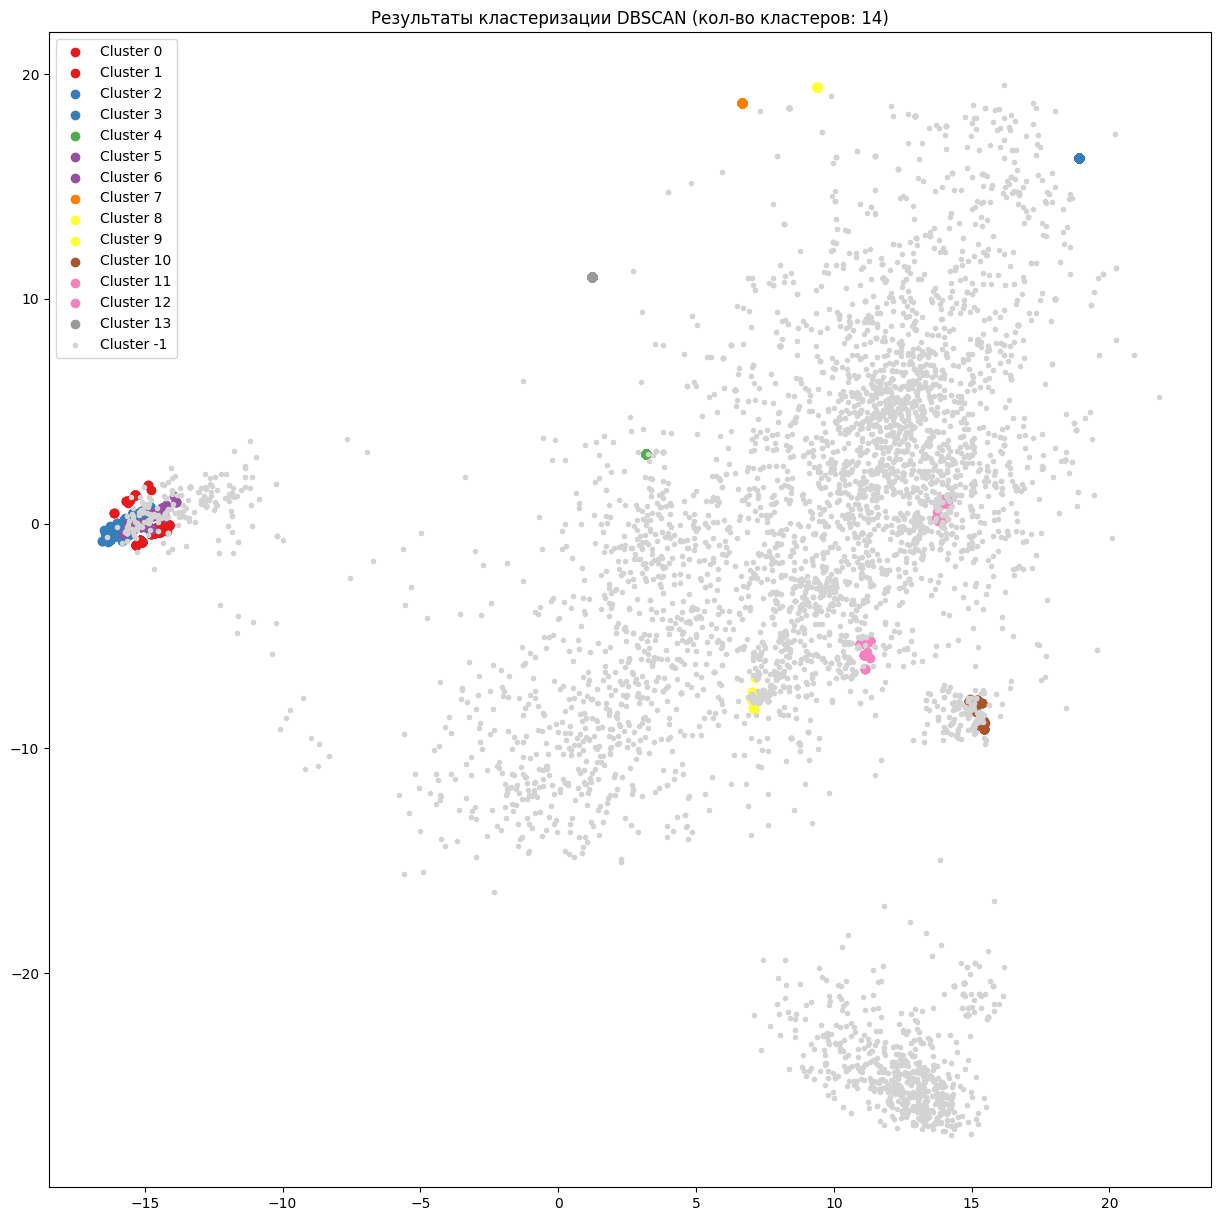

In [56]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация результатов
plt.figure(figsize=(15, 15))
unique_labels = set(labels)
colors = plt.cm.get_cmap('Set1', len(unique_labels))

for label in unique_labels:
    if label == -1:
        color = 'lightgrey'
        marker = '.'
        label_name = 'Noise'
    else:
        color = colors(label)
        marker = 'o'
    
    plt.scatter(data_pca[labels == label, 0], data_pca[labels == label, 1], 
                c=[color], label=f'Cluster {label}', marker=marker)

plt.title(f'Результаты кластеризации DBSCAN (кол-во кластеров: {n_clusters})')
plt.legend()
plt.show()